In [1]:
from Outline_of_DPN_training import DpnTraining
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
import numpy as np


DATA_FILE_NAME = "trajectory_dict.pickle"
TRAJECTORY_LENGTH = 30 #Approximately 10 seconds
MIDPOINTS = 2 #splits video data into trajectories of length above, but this determines the amount of overlap across trajectories

EPSILON_PERTURBATIONS = False  #if we want the network to predict how to perturb LS vector.
ITERATIONS = 100 #kinda like epochs?
BATCH_SIZE = 10   #Might be the exact same thing as episodes, up for interpretation.
EPISODES = 20     #How many trajectories to explore for a given job. Essentually to get a better estimate of the expected reward.
DISCOUNT = 0.99   #how much to discount the reward
ALPHA = 0.001     #learning rate?
INPUT_SIZE = 20
weight = torch.Tensor([0.5])

class DPN(nn.Module):
    """AGENTS"""
    def __init__(self, input_size):
        super(DPN, self).__init__()

        self.fc1 = nn.Linear(input_size, input_size)
        self.fc2 = nn.Linear(input_size, input_size)
        self.fc3 = nn.Linear(input_size, input_size)
        self.fc41 = nn.Linear(input_size, input_size)
        self.fc42 = nn.Linear(input_size, input_size)
        self.fc51 = nn.Linear(input_size, input_size)
        self.fc52 = nn.Linear(input_size, input_size)
        self.fc61 = nn.Linear(input_size, input_size)
        self.fc62 = nn.Linear(input_size, input_size)

    def forward(self, x):
        residual = x
        h = F.tanh(self.fc1(x)) + x
        h = F.tanh(self.fc2(h)) + h + x
        h = F.tanh(self.fc3(h)) 
        #Mu side
        mu = F.tanh(self.fc41(h)) + h
        mu = F.tanh(self.fc51(mu)) + h
        mu = F.prelu(self.fc61(mu), torch.Tensor([0.5])) + residual
        #logsigma side
        logvar = F.prelu(self.fc42(h), torch.Tensor([0.5]))
        logvar = F.prelu(self.fc52(logvar), torch.Tensor([0.5]))
        logvar = F.prelu(self.fc62(logvar), torch.Tensor([0.5]))
        return mu, logvar

In [2]:

dpn = DpnTraining(INPUT_SIZE = INPUT_SIZE, policy_net = DPN)

In [29]:
dpn.train(ITERATIONS)

Iteration 1 Completed with reward: -150.1029052734375 Variance of :3.058174411857483
Average last avg reward: -4.732215988636017 last variance avg: 0.764354885295405
Iteration 2 Completed with reward: -437.9858093261719 Variance of :3.91683263934033
Average last avg reward: -5.409472966194153 last variance avg: 0.4829042962790001
Iteration 3 Completed with reward: -130.82059173583986 Variance of :2.559837068224993
Average last avg reward: -4.833742356300354 last variance avg: 0.6616681236058425
Iteration 4 Completed with reward: -126.44208374023438 Variance of :3.9086455640858104
Average last avg reward: -5.864372265338898 last variance avg: 0.9480617997234365
Iteration 5 Completed with reward: -117.4855224609375 Variance of :3.47938126829959
Average last avg reward: -4.31582955121994 last variance avg: 0.6215589641181122
Iteration 6 Completed with reward: -305.67757720947264 Variance of :4.652868837851657
Average last avg reward: -4.4418877243995665 last variance avg: 0.68805430197812

Iteration 50 Completed with reward: -99.95115814208984 Variance of :0.09346849460039419
Average last avg reward: -0.531362646818161 last variance avg: 0.014965068938996918
Iteration 51 Completed with reward: -175.36477432250976 Variance of :0.055613792515242566
Average last avg reward: -3.266703748703003 last variance avg: 0.01828961633195615
Iteration 52 Completed with reward: -73.47513885498047 Variance of :0.04266757778489146
Average last avg reward: -3.0142568945884705 last variance avg: 0.016751588928962193
Iteration 53 Completed with reward: -391.3314666748047 Variance of :0.05694295951730348
Average last avg reward: -2.4180018067359925 last variance avg: 0.01017698656912644
Iteration 54 Completed with reward: -23.87889633178711 Variance of :0.03843284872665275
Average last avg reward: -1.4076534509658813 last variance avg: 0.013362015899281654
Iteration 55 Completed with reward: -44.8032585144043 Variance of :0.04667653808945177
Average last avg reward: -0.8878777503967286 last 

Iteration 98 Completed with reward: -433.30897369384763 Variance of :0.003896850661937481
Average last avg reward: -45.40024528503418 last variance avg: 0.001070220711328493
Iteration 99 Completed with reward: -243.35930786132812 Variance of :0.005228860854392526
Average last avg reward: -17.039346122741698 last variance avg: 0.0006970507547559363
Iteration 100 Completed with reward: -138.91782836914064 Variance of :0.004336000712681408
Average last avg reward: -4.042917513847351 last variance avg: 0.0010733604587379532


In [30]:
y1 = dpn.rewards_last
y2 = []
mean = lambda x: sum(x)/len(x)
for i in range(len(y1)):
    if i < 10:
        pass
    else:
        avg = mean(y1[(i-10):i])
        y2.append(avg)
    

In [31]:
import matplotlib.pyplot as plt

In [32]:
mean(y1[0:5])

-5.031126625537873

In [33]:
y2[0:10]

[-4.923844046592713,
 -5.303440164327621,
 -5.20564269542694,
 -5.101868497133255,
 -4.878773120641708,
 -4.807709879875183,
 -4.721016663312913,
 -4.638732038736344,
 -4.561909067630768,
 -4.63521461725235]

In [34]:
%matplotlib inline

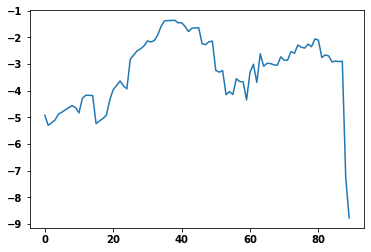

In [35]:
plt.plot(y2)
plt.show()

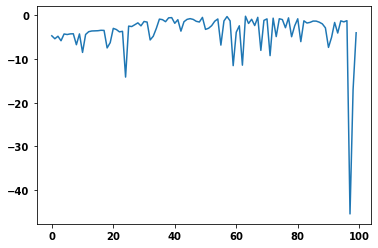

In [36]:
plt.plot(y1)
plt.show()

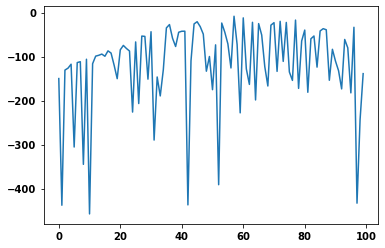

In [37]:
rew = dpn.rewards
plt.plot(rew)
plt.show()

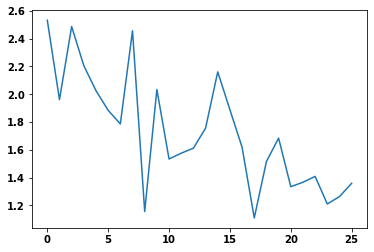

In [11]:
var = dpn.variance
plt.plot(var)
plt.show()

In [17]:
torch.Tensor(np.array([0.5]))

tensor([0.5000])